In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
data=pd.read_csv('Social_Network_Ads.csv')
data.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
X=data.iloc[:,2:4].values

In [31]:
y=data.iloc[:,-1].values

In [32]:


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20)



In [33]:


from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()



In [34]:
X_train=scaler.fit_transform(X_train)

In [35]:


X_test=scaler.transform(X_test)

In [36]:
# 1st method
np.sqrt(X_train.shape[0])

np.float64(17.88854381999832)

In [37]:


from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=17)



In [38]:
# Train our model
knn.fit(X_train,y_train)

,n_neighbors,17
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [39]:
y_pred=knn.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9625

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[47,  2],
       [ 1, 30]])

In [42]:
# Effect of K on Training Error rate and Validation Error rate

error_train=[]
error_test=[]

for i in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    x=confusion_matrix(y_train,knn.predict(X_train))
    y=confusion_matrix(y_test,knn.predict(X_test))
    error_train.append((x[0][1]+x[1][0])/x.sum())
    error_test.append((y[0][1]+y[1][0])/y.sum())
    

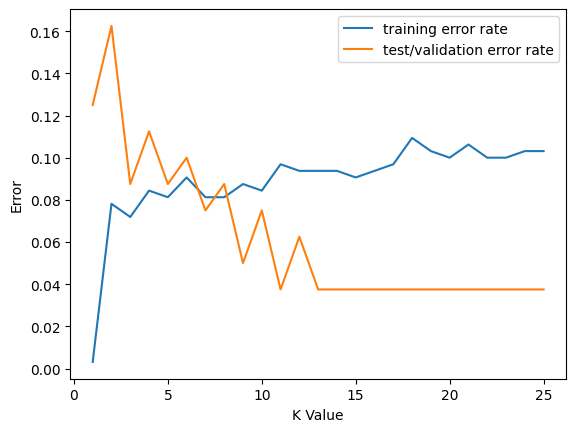

In [43]:


plt.plot(range(1,26),error_train,label='training error rate')
plt.plot(range(1,26),error_test,label='test/validation error rate')
plt.xlabel('K Value')
plt.ylabel('Error')
plt.legend()



In [44]:


knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train,y_train)



,n_neighbors,11
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [45]:
y_pred=knn.predict(X_test)

accuracy_score(y_test,y_pred)



0.9625

In [46]:
def predict_output():
    age=int(input("Enter the age"))
    salary=int(input("Enter the salary"))
    
    X_new=np.array([[age],[salary]]).reshape(1,2)
    X_new=scaler.transform(X_new)
    
    if knn.predict(X_new)[0]==0:
        return "Will not purchase"
    else:
        return "Will purchase"

In [47]:
predict_output()

'Will not purchase'

# 1. Decision Boundary for Knn

In [48]:


a=np.arange(start=X_train[:,0].min()-1, stop=X_train[:,0].max()+1, step=0.01)
b=np.arange(start=X_train[:,1].min()-1, stop=X_train[:,1].max()+1, step=0.01)


XX,YY=np.meshgrid(a,b)



In [49]:


input_array=np.array([XX.ravel(),YY.ravel()]).T

labels=knn.predict(input_array)



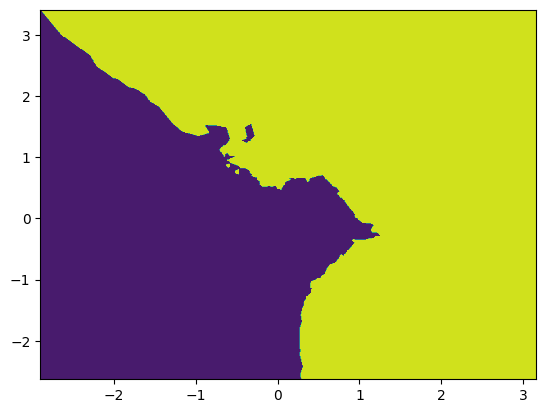

In [50]:
plt.contourf(XX,YY,labels.reshape(XX.shape))

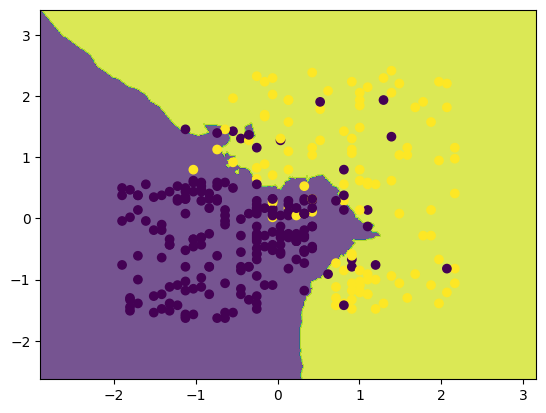

In [51]:


plt.contourf(XX,YY,labels.reshape(XX.shape), alpha=0.75)
plt.scatter(X_train[:,0],X_train[:,1], c=y_train)



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def keffect(data, k, max_points=50000):
    # Load data
    data = pd.read_csv(data)
    X = data.iloc[:, 2:4].values
    y = data.iloc[:, -1].values
    
    # Train KNN
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    
    # Determine bounds
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    # Auto step size to limit total points
    step_x = (x_max - x_min) / 200  # ~200 points in x-axis
    step_y = (y_max - y_min) / 200  # ~200 points in y-axis
    
    a = np.arange(x_min, x_max, step_x, dtype=np.float32)
    b = np.arange(y_min, y_max, step_y, dtype=np.float32)

    XX, YY = np.meshgrid(a, b)
    
    # Predict labels
    input_array = np.c_[XX.ravel(), YY.ravel()]
    labels = knn.predict(input_array)
    
    # Plot
    plt.figure(figsize=(8, 6))
    plt.contourf(XX, YY, labels.reshape(XX.shape), alpha=0.5, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k')
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title(f"KNN Decision Boundary (k={k})")
    plt.show()


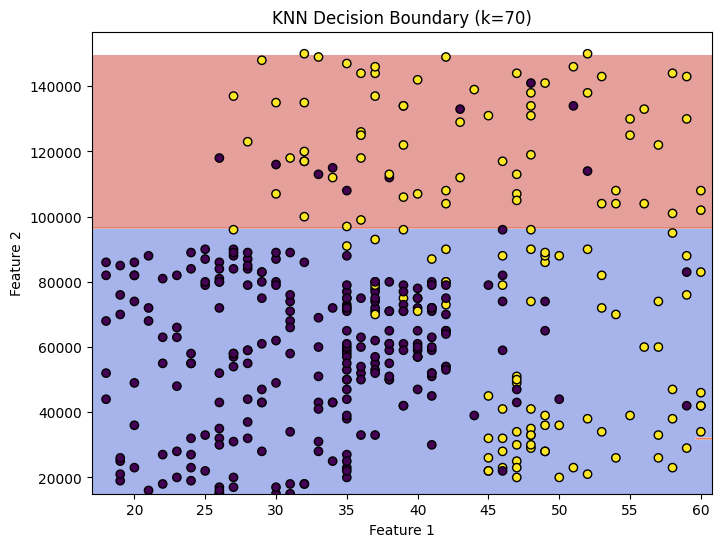

In [10]:


keffect('Social_Network_Ads.csv',70)



In [11]:
import streamlit as st
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris, make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

def load_dataset(selected_dataset):
    if selected_dataset == "Breast Cancer":
        data = load_breast_cancer()
    elif selected_dataset == "Iris":
        data = load_iris()
    elif selected_dataset == "Synthetic":
        data = make_classification(n_samples=10000, n_features=10, n_informative=8, n_redundant=2, random_state=42)
    else:
        raise ValueError("Invalid dataset selection.")
    return data

# Sidebar
st.sidebar.title("KNN Classifier Hyperparameter Tuning")
selected_dataset = st.sidebar.selectbox("Select Dataset", ["Breast Cancer", "Iris", "Synthetic"])
test_size = st.sidebar.slider("Test Size", 0.1, 0.5, 0.2, step=0.05)
n_neighbors = st.sidebar.slider("Number of Neighbors (k)", 1, 20, 5)
weights = st.sidebar.selectbox("Weight function", ["uniform", "distance"])
algorithm = st.sidebar.selectbox("Algorithm", ["auto", "ball_tree", "kd_tree", "brute"])
p_value = st.sidebar.slider("Minkowski Power (p)", 1, 10, 2)
leaf_size = st.sidebar.slider("Leaf Size", 1, 50, 30)

# Load selected dataset
data = load_dataset(selected_dataset)

if selected_dataset == "Synthetic":
    X, y = data
else:
    X = data.data
    y = data.target

# Display dataset information in the main window
st.title(f"Dataset Information for {selected_dataset}")
st.write(f"No. of Data Points: {X.shape[0]}")
st.write(f"No. of Features: {X.shape[1]}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# KNN model
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, algorithm=algorithm, p=p_value, leaf_size=leaf_size)
knn_model.fit(X_train, y_train)

# Make predictions
y_pred = knn_model.predict(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Display metrics
st.title("Model Evaluation Metrics")
st.write(f"Accuracy: {accuracy:.2f}")
st.write("Confusion Matrix:")
st.write(conf_matrix)

2025-08-10 14:00:04.658 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:00:04.748 
  command:

    streamlit run /home/kibria/dl_env/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-08-10 14:00:04.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:00:04.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:00:04.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:00:04.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:00:04.750 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-10 14:00:04.750 Thread 'MainThrea